# CA04 – Ensemble Models

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn

# import the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics


# Part 1. Data Source and Contents from CA03


In [2]:
#get the data
url = 'https://github.com/ArinB/MSBA-CA-Data/blob/main/CA03/census_data.csv?raw=true'
data = pd.read_csv(url, encoding = 'ISO-8859-1')

## 1. Data Quality Analysis (DQA)

In [3]:
#inspect the shape of the data
data.shape 

(48842, 11)

In [4]:
#inspect first few rows
data.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [5]:
#inspect last few rows
data.tail()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0
48841,e. 51-60,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,c. 31-35 & 61-70,test,1


In [6]:
# checking missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


## 2. Exploratory Data Analysis (EDA)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [8]:
#creating a function for plotting a categorical variable 
def plot_categories(data, column_number):
    data = data
    column_class = data.iloc[:, [column_number,10]] #get the column values and the prediction class
    column_name = column_class.columns[0] #get the column name (categorical variable)
    
    plot_data = column_class.groupby([column_name], as_index = False).agg('mean') #calculate the ratio of 0 and 1
    
    plot_data['flag, 0'] = (1 - plot_data['y'])*100 #create 2 columns and transorm ratios into percentages
    plot_data['flag, 1'] = plot_data['y']*100
    plot_data = plot_data.drop(columns = ['y']) #drop the original agg column
    
    plot_data.plot( x = column_name, kind='bar', stacked=True, #plot the results using matplotlib
            title='Percentage of salaries |<=50k:0, >50k:1| by ------' + column_name)
    plt.legend(loc="right", bbox_to_anchor=(1.3, 0.5))

In [9]:
#creating a function that plots all categorical variables
def plot_all_categories(data):
    for i in range(len(data.columns)-1):
        plot_categories(data, i)

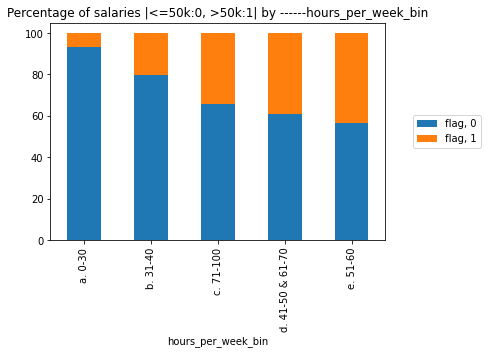

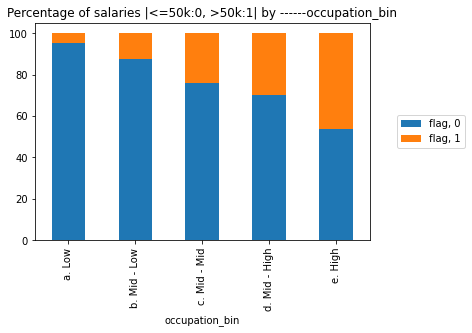

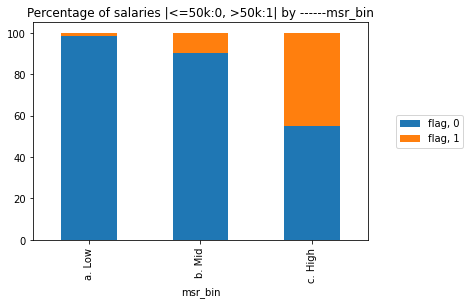

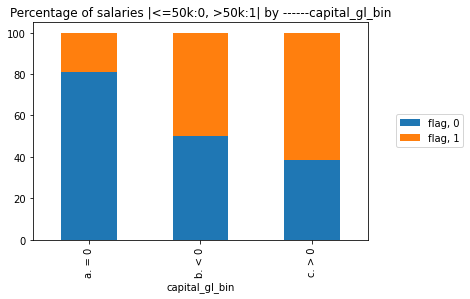

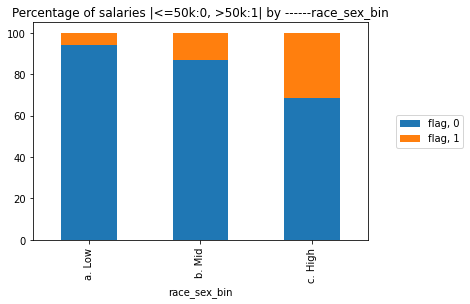

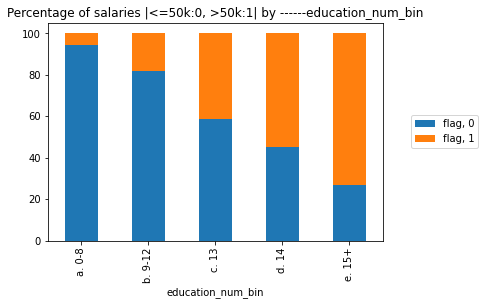

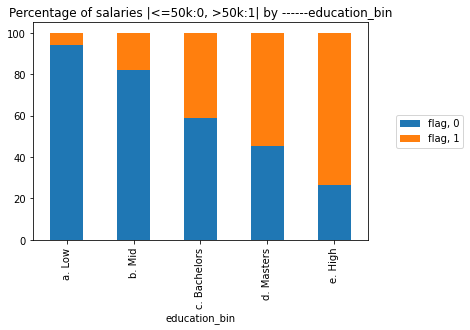

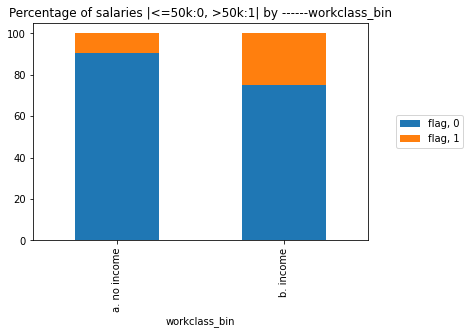

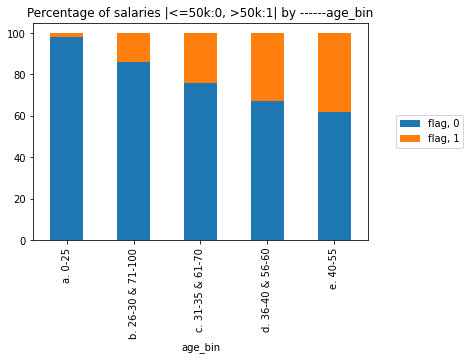

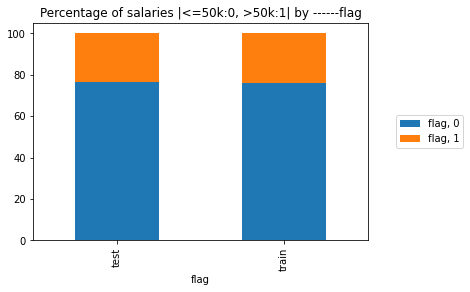

In [10]:
#plot all categorical variables in the dataset
plot_all_categories(data)

In [11]:
data.describe() #Judging by the mean there is a disbalance in the data. We can fix it.

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


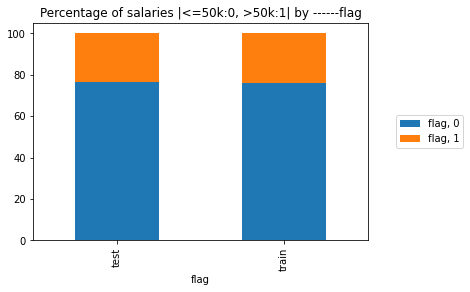

In [12]:
#we can see that the data is imbalanced there are much more 0's than 1's
plot_categories(data, 9)

## Fixing imbalanced data

In [13]:
#fixing the imbalanced data

In [14]:
#how many observations of each class do we have
print(data[data['y']==1].shape)
print(data[data['y']==0].shape)

(11687, 11)
(37155, 11)


In [15]:
#sampling the same number of observations as 1's
sampled_0 = data[data['y']==0].sample(n = 11687, replace=False, random_state=101)
sampled_0.shape

(11687, 11)

In [16]:
#creating the correected dataset
data = data[data['y']==1].append(sampled_0)
data.shape

(23374, 11)

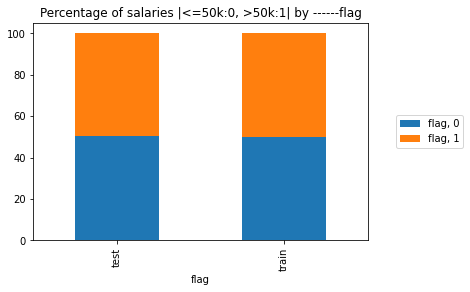

In [17]:
plot_categories(data, 9)
#now it's nice and balanced

## Encode the data

In [18]:
#label encoding to feed into decision tree
le_list = []
le_data = data.copy()
for i in range(len(le_data.columns)-1):
  le_list.append(preprocessing.LabelEncoder())
  le_data.iloc[:,i] = le_list[i].fit_transform(le_data.iloc[:,i])
  print(i, le_list[i].classes_)
le_data.head()

0 ['a. 0-30' 'b. 31-40' 'c. 71-100' 'd. 41-50 & 61-70' 'e. 51-60']
1 ['a. Low' 'b. Mid - Low' 'c. Mid - Mid' 'd. Mid - High' 'e. High']
2 ['a. Low' 'b. Mid' 'c. High']
3 ['a. = 0' 'b. < 0' 'c. > 0']
4 ['a. Low' 'b. Mid' 'c. High']
5 ['a. 0-8' 'b. 9-12' 'c. 13' 'd. 14' 'e. 15+']
6 ['a. Low' 'b. Mid' 'c. Bachelors' 'd. Masters' 'e. High']
7 ['a. no income' 'b. income']
8 ['a. 0-25' 'b. 26-30 & 71-100' 'c. 31-35 & 61-70' 'd. 36-40 & 56-60'
 'e. 40-55']
9 ['test' 'train']


,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
7,3,4,2,0,2,1,1,1,4,1,1
8,3,4,1,2,1,3,3,1,2,1,1
9,1,4,2,2,2,2,2,1,4,1,1
10,2,4,2,0,1,1,1,1,3,1,1
11,1,4,2,0,2,2,2,1,1,1,1


In [19]:
# splitting data into train and test
train_data = le_data[le_data['flag'] == 1]
test_data = le_data[le_data['flag'] == 0]

In [20]:
#further splitting into X and y
X_train = train_data.iloc[:,0:9]
y_train = train_data.iloc[:,10]
X_test = test_data.iloc[:,0:9]
y_test = test_data.iloc[:,10]

X_test.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
32563,1,3,2,0,2,1,1,1,1
32564,1,1,2,2,1,1,1,1,4
32568,1,4,2,2,2,4,4,1,2
32571,1,1,2,2,2,1,1,1,2
32575,3,1,2,2,2,1,1,1,4


# Part 2. Plot optimal values of a key Hyper-parameter

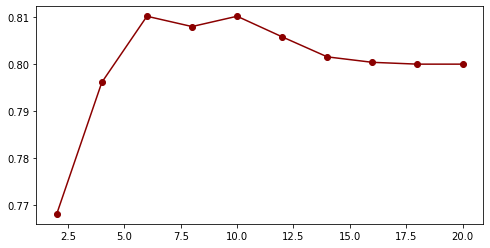

In [21]:
# finding optimal Maximum Depth
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth = trees, random_state = 101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)
plt.figure(figsize = (8,4))

pd.Series(results, max_depth_options).plot(color = "darkred", marker = "o")

# Part 3. Building a Random Forest Model

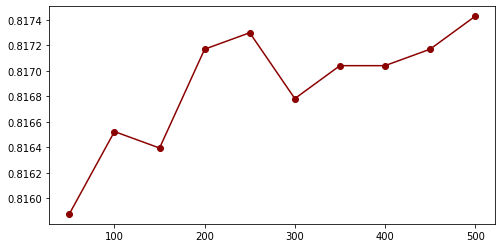

In [22]:
# plot Accuracy vs Number of estimators
max_depth=6
results = []
estimator_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for n_estimators in estimator_options:
    clf = RandomForestClassifier(n_estimators = n_estimators, max_depth=max_depth, random_state=101)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)
plt.figure(figsize = (8,4))

pd.Series(results, estimator_options).plot(color = "darkred", marker = "o")

# Part 4. Building AdaBoost, Gradient Boost (classifier) and XGB Model

In [23]:
# define common parrameters (yours might be different because I balanced the data)
max_depth = 6
n_estimators = 500

# create an empty DataFrame to hold the results
results = pd.DataFrame(columns= ['Random_Forest', 'AdaBoost', 'Gradient Boost', 'XGB'], index = ['Accuracy', 'AUC'])
results

,Random_Forest,AdaBoost,Gradient Boost,XGB
Accuracy,NaN,NaN,NaN,NaN
AUC,NaN,NaN,NaN,NaN


In [24]:
# build Random Forest
clf = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, random_state=101)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# get the metrics
accuracy = np.mean(y_test == y_pred)
auc = roc_auc_score(y_test, y_pred)

# saving the results
results.loc['Accuracy', 'Random_Forest'] = accuracy
results.loc['AUC', 'Random_Forest'] = auc
results

,Random_Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.81743,NaN,NaN,NaN
AUC,0.817758,NaN,NaN,NaN


In [25]:
# build AdaBoost
clf = AdaBoostClassifier(n_estimators = n_estimators, random_state=101)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# get the metrics
accuracy = np.mean(y_test == y_pred)
auc = roc_auc_score(y_test, y_pred)

# saving the results
results.loc['Accuracy', 'AdaBoost'] = accuracy
results.loc['AUC', 'AdaBoost'] = auc
results

,Random_Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.81743,0.818076,NaN,NaN
AUC,0.817758,0.818261,NaN,NaN


In [26]:
# build Gradient Boost
clf = GradientBoostingClassifier(max_depth = max_depth, n_estimators = n_estimators, random_state=101)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# get the metrics
accuracy = np.mean(y_test == y_pred)
auc = roc_auc_score(y_test, y_pred)

# saving the results
results.loc['Accuracy', 'Gradient Boost'] = accuracy
results.loc['AUC', 'Gradient Boost'] = auc
results

,Random_Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.81743,0.818076,0.810577,NaN
AUC,0.817758,0.818261,0.810728,NaN


In [27]:
# build XGB model
clf = XGBClassifier(max_depth = max_depth, n_estimators = n_estimators, random_state=101)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# get the metrics
accuracy = np.mean(y_test == y_pred)
auc = roc_auc_score(y_test, y_pred)

# saving the results
results.loc['Accuracy', 'XGB'] = accuracy
results.loc['AUC', 'XGB'] = auc
results

,Random_Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.81743,0.818076,0.810577,0.812645
AUC,0.817758,0.818261,0.810728,0.812784


# Part 5. Compare Performance

In [29]:
# print the common hyper-parameters and the results
print('max_depth =', max_depth)
print('n_estimators =', n_estimators)
results

max_depth = 6
n_estimators = 500


,Random_Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.81743,0.818076,0.810577,0.812645
AUC,0.817758,0.818261,0.810728,0.812784


# 6. Deliverables

All deliverables were delivered on time and in full. 

# Thank you for reading this Notebook till the end!